In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_path1 = 'ThiTNTHPT2022.xlsx'
df = pd.read_excel(file_path1)

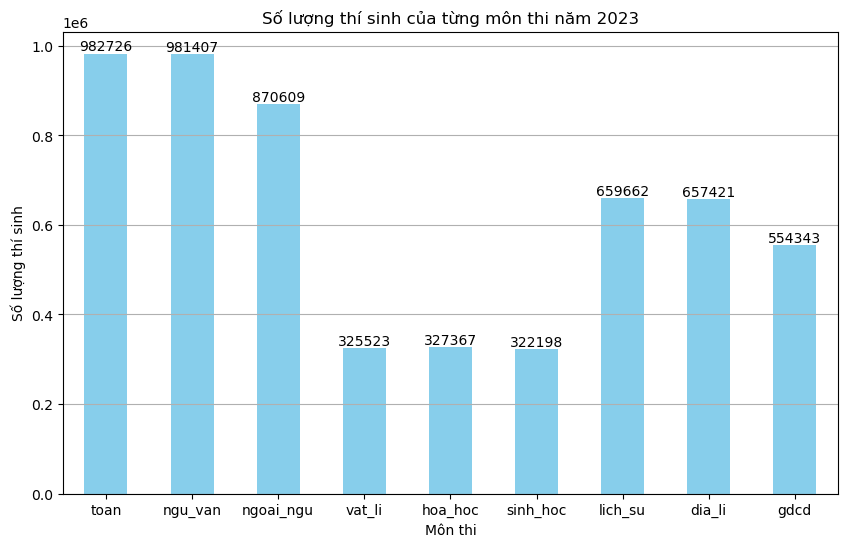

Tổng số lượng thí sinh dự thi là 995441


In [4]:
subject_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
subject_counts = df[subject_columns].notna().sum()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar', color='skyblue')
plt.title('Số lượng thí sinh của từng môn thi năm 2023')
plt.xlabel('Môn thi')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=0)
plt.grid(axis='y')
# Thêm nhãn giá trị lên các cột
for i, value in enumerate(subject_counts):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')

plt.show()
count_of_all = df['sbd'].count()
print(f'Tổng số lượng thí sinh dự thi là {count_of_all}')

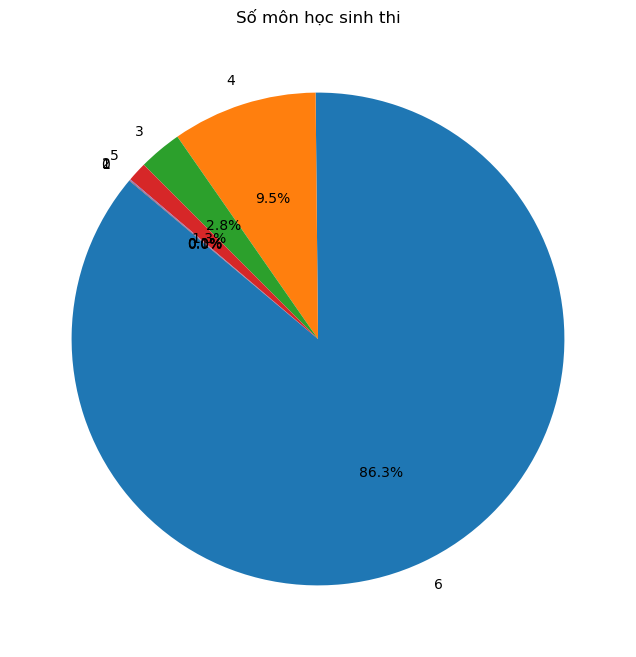

In [5]:
# Tính số lượng môn thi mà mỗi thí sinh đã thi (không tính điểm 0)
df['so_mon_thi'] = df.iloc[:, 1:].count(axis=1)

# Tính toán tần suất thí sinh thi bao nhiêu môn
mon_thi_counts = df['so_mon_thi'].value_counts()

# Vẽ biểu đồ hình tròn (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(mon_thi_counts, labels=mon_thi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Số môn học sinh thi')
plt.show()

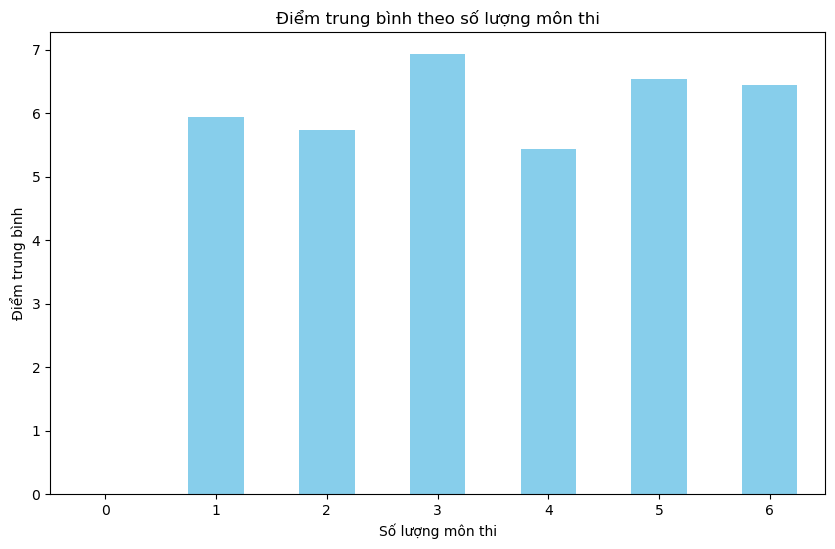

In [6]:
# Giả sử các cột từ cột thứ 2 đến cuối là các cột điểm thi
relevant_columns = ['dia_li', 'gdcd', 'hoa_hoc', 'lich_su', 'ngoai_ngu', 'ngu_van', 'sinh_hoc', 'toan', 'vat_li']

# Chuyển đổi các cột điểm thành kiểu số, thay thế giá trị không phải số bằng NaN
df[relevant_columns] = df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Tính số lượng môn thi mà mỗi thí sinh đã thi (chỉ tính các môn có điểm lớn hơn 0)
df['so_mon_thi'] = df[relevant_columns].apply(lambda x: (x > 0).sum(), axis=1)

# Tính điểm trung bình cho mỗi thí sinh (bỏ qua các môn không thi hoặc điểm = NaN)
df['diem_trung_binh'] = df[relevant_columns].mean(axis=1)

# Tính toán điểm trung bình theo số lượng môn thi
diem_trung_binh_theo_so_mon = df.groupby('so_mon_thi')['diem_trung_binh'].mean()

# Vẽ biểu đồ cột (bar chart) hiển thị điểm trung bình theo số lượng môn thi
plt.figure(figsize=(10, 6))
diem_trung_binh_theo_so_mon.plot(kind='bar', color='skyblue')
plt.xlabel('Số lượng môn thi')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình theo số lượng môn thi')
plt.xticks(rotation=0)
plt.show()

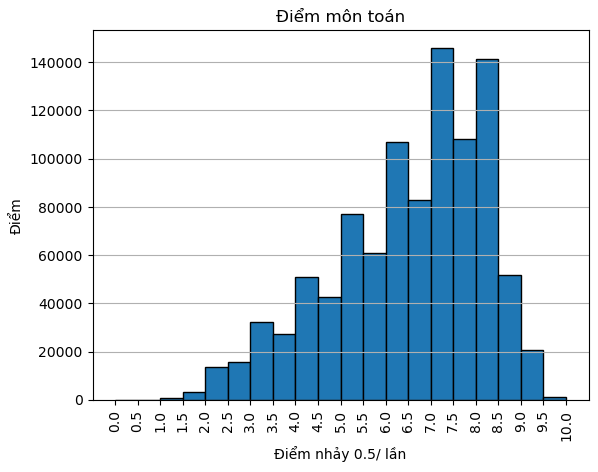

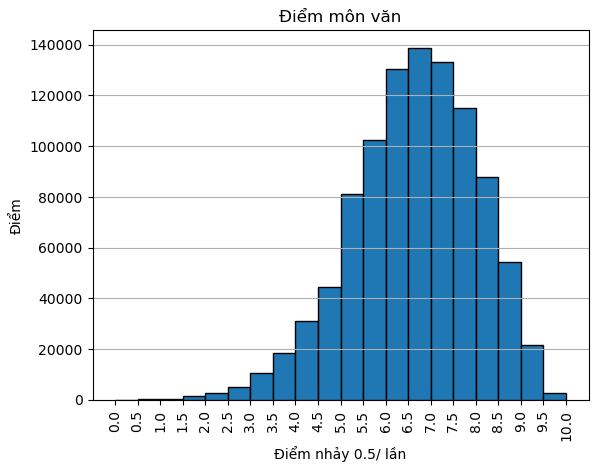

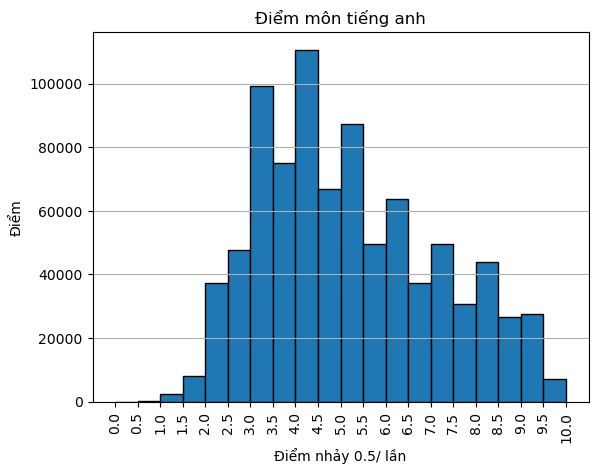

In [7]:
#Điểm toán
bins = [i * 0.5 for i in range(21)]
diemtoan_df = df['toan']
plt.hist(diemtoan_df, bins=bins, edgecolor='black')
plt.title('Điểm môn toán')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemtoan_df.describe())

#Điểm ngữ văn
diemnguvan_df = df['ngu_van']
plt.hist(diemnguvan_df, bins=bins, edgecolor='black')
plt.title('Điểm môn văn')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemnguvan_df.describe())

#Điểm ngoại ngữ
diemngoaingu_df = df['ngoai_ngu']
plt.hist(diemngoaingu_df, bins=bins, edgecolor='black')
plt.title('Điểm môn tiếng anh')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemngoaingu_df.describe())

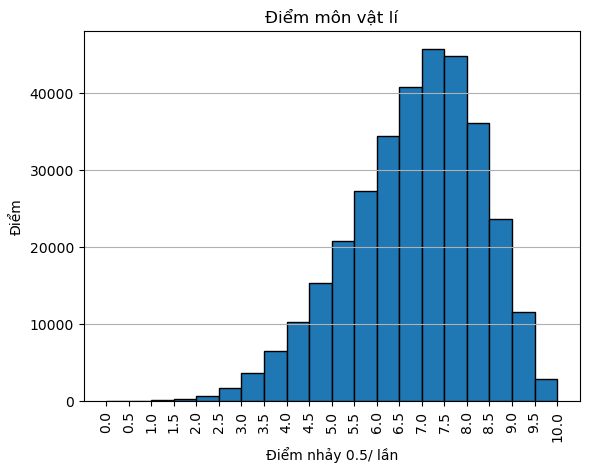

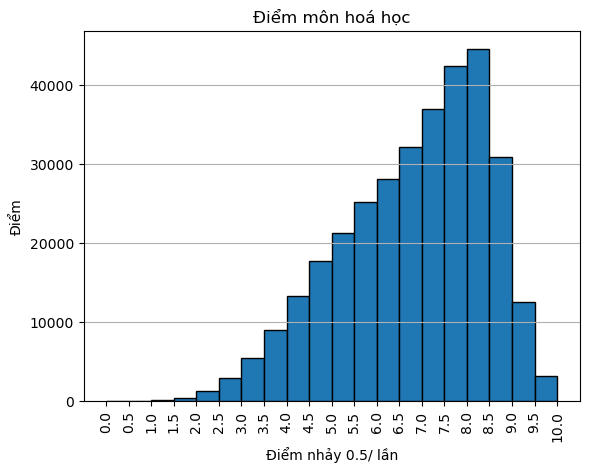

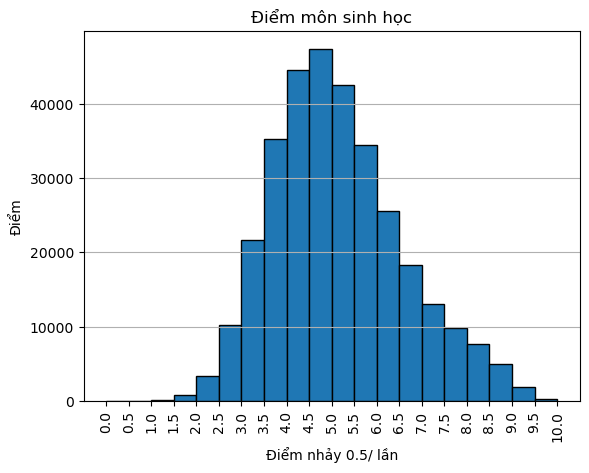

In [8]:
#Điểm lý
diemly_df = df['vat_li']
# Trích xuất cột 'vat_li' và chuyển đổi sang số
diemly_df = pd.to_numeric(df['vat_li'], errors='coerce')
plt.hist(diemly_df, bins=bins, edgecolor='black')
plt.title('Điểm môn vật lí')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemly_df.describe())

#Điểm hoá
diemhoa_df = df['hoa_hoc']
plt.hist(diemhoa_df, bins=bins, edgecolor='black')
plt.title('Điểm môn hoá học')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemhoa_df.describe())

#Điểm sinh
diemsinh_df = df['sinh_hoc']
plt.hist(diemsinh_df, bins=bins, edgecolor='black')
plt.title('Điểm môn sinh học')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemsinh_df.describe())

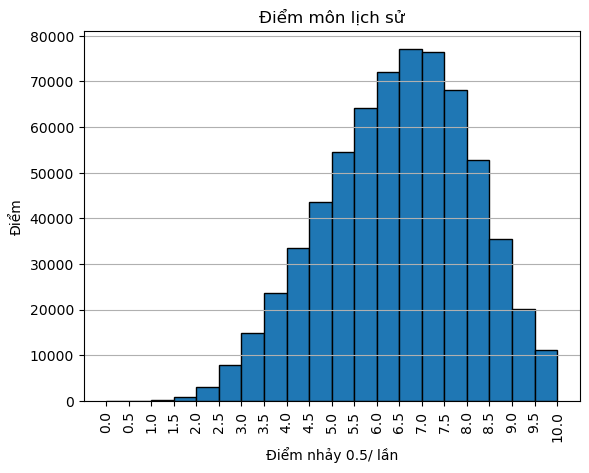

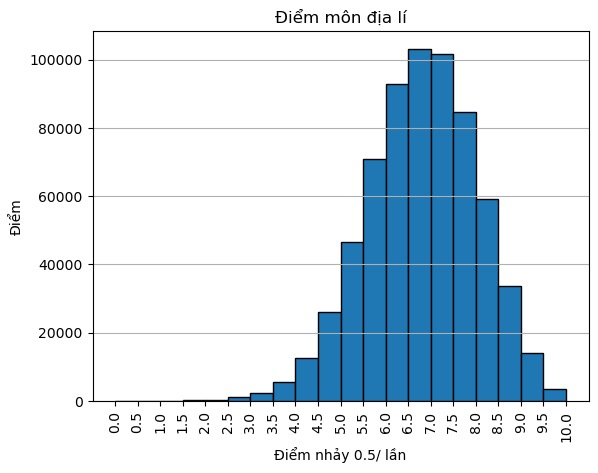

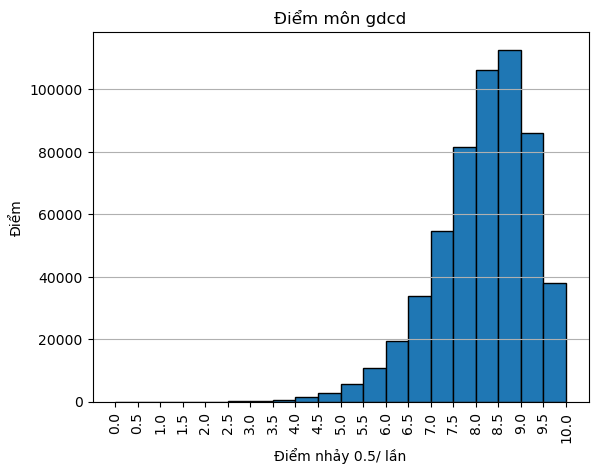

In [9]:
#Điểm sử 
diemsu_df = df['lich_su']
plt.hist(diemsu_df, bins=bins, edgecolor='black')
plt.title('Điểm môn lịch sử')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemsu_df.describe())

#Điểm địa
diemdia_df = df['dia_li']
plt.hist(diemdia_df, bins=bins, edgecolor='black')
plt.title('Điểm môn địa lí')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemdia_df.describe())

#Điểm gdcd
diemgdcd_df = df['gdcd']
plt.hist(diemgdcd_df, bins=bins, edgecolor='black')
plt.title('Điểm môn gdcd')
plt.xlabel('Điểm nhảy 0.5/ lần')
plt.ylabel('Điểm')
plt.xticks(bins, rotation = 90)
plt.grid(axis='y')
plt.show()
print(diemgdcd_df.describe())

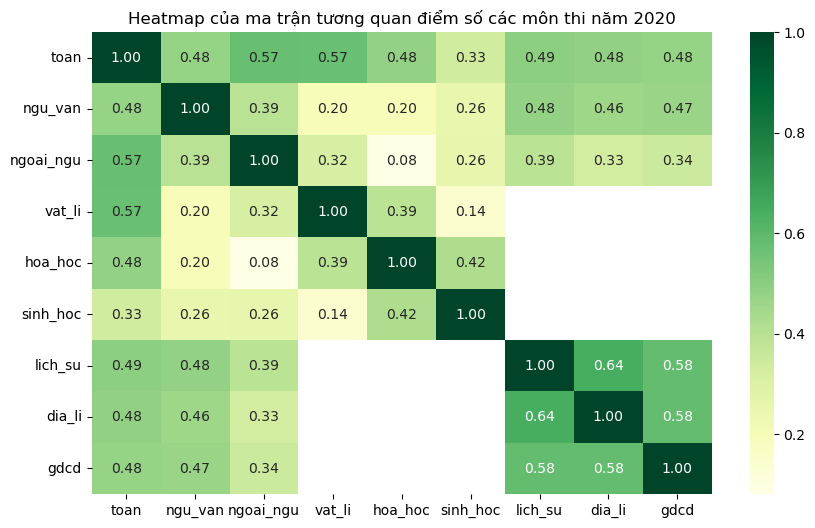

In [21]:
subjects_scores = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].apply(pd.to_numeric, errors='coerce')

Correlation_matrix = subjects_scores.corr()

plt.figure(figsize=(10,6))
sns.heatmap(Correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap của ma trận tương quan điểm số các môn thi năm 2020')
plt.show()
